In [1]:
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages') 
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import intake
from easygems.healpix import attach_coords, healpix_show, healpix_contour
import easygems.healpix as egh
import numpy as np
import xarray as xr
import seaborn as sn
import geopy.distance

cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")

In [2]:
era5 = cat.HERA5(time="P1D").to_dask().pipe(attach_coords)
era5_hourly = cat.HERA5(time="PT1H").to_dask().pipe(attach_coords)


In [3]:
era5_monthly = cat.HERA5(time="P1M").to_dask().pipe(attach_coords)

In [4]:
era5_monthly

<xarray.Dataset>
Dimensions:    (time: 164, cell: 196608, level: 29, crs: 1)
Coordinates:
  * crs        (crs) float64 nan
    latitude   (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
  * level      (level) int64 50 70 100 125 150 175 ... 875 900 925 950 975 1000
    longitude  (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2010-01-16T04:15:00 ... 2023-08-16T03:15:00
    lat        (cell) float64 0.2984 0.5968 0.5968 ... -0.5968 -0.5968 -0.2984
    lon        (cell) float64 45.0 45.35 44.65 45.0 ... 315.0 315.4 314.6 315.0
Dimensions without coordinates: cell
Data variables: (12/73)
    100u       (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    100v       (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    10si       (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    10u        (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    10v        (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    2d         (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    ...         ...
    isor       (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    lsm        (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    sdfor      (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    sdor       (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    slor       (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    z_sfc      (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
Attributes:
    title:           HERA5 - HEALPixelation of ERA5
    description:     Selected variables from ERA5, restructured and saved on ...
    source:          Post-processed dataset based on the ERA5 mirror located ...
    creator:         Lukas Kluft
    institution:     Max Planck Institute for Meteorology
    contact:         lukas.kluft@mpimet.mpg.de
    acknowledgment:  Contains modified Copernicus Climate Change Service info...

In [5]:
cwv_crit = 50.0
halo_speed_km_h = 850
EC_angle = 7.0

In [6]:
coordinates = {'mindeloNorth': 16.88, 'mindeloEast': -24.98, 
               'salNorth': 16.74, 'salEast': -22.94, 
               'bcoNorth': 13.15, 'bcoEast': -59.42,
              } 

In [7]:
era5.where(era5.lsm)

<xarray.Dataset>
Dimensions:    (time: 4991, cell: 196608, level: 29, crs: 1)
Coordinates:
  * crs        (crs) float64 nan
    latitude   (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
  * level      (level) int64 50 70 100 125 150 175 ... 875 900 925 950 975 1000
    longitude  (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2010-01-01T12:00:00 ... 2023-08-31T12:00:00
    lat        (cell) float64 0.2984 0.5968 0.5968 ... -0.5968 -0.5968 -0.2984
    lon        (cell) float64 45.0 45.35 44.65 45.0 ... 315.0 315.4 314.6 315.0
Dimensions without coordinates: cell
Data variables: (12/72)
    100u       (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    100v       (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    10u        (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    10v        (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    2d         (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    2t         (time, cell) float32 dask.array<chunksize=(24, 4096), meta=np.ndarray>
    ...         ...
    isor       (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    lsm        (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    sdfor      (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    sdor       (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    slor       (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
    z_sfc      (cell) float32 dask.array<chunksize=(196608,), meta=np.ndarray>
Attributes:
    title:           HERA5 - HEALPixelation of ERA5
    description:     Selected variables from ERA5, restructured and saved on ...
    source:          Post-processed dataset based on the ERA5 mirror located ...
    creator:         Lukas Kluft
    institution:     Max Planck Institute for Meteorology
    contact:         lukas.kluft@mpimet.mpg.de
    acknowledgment:  Contains modified Copernicus Climate Change Service info...

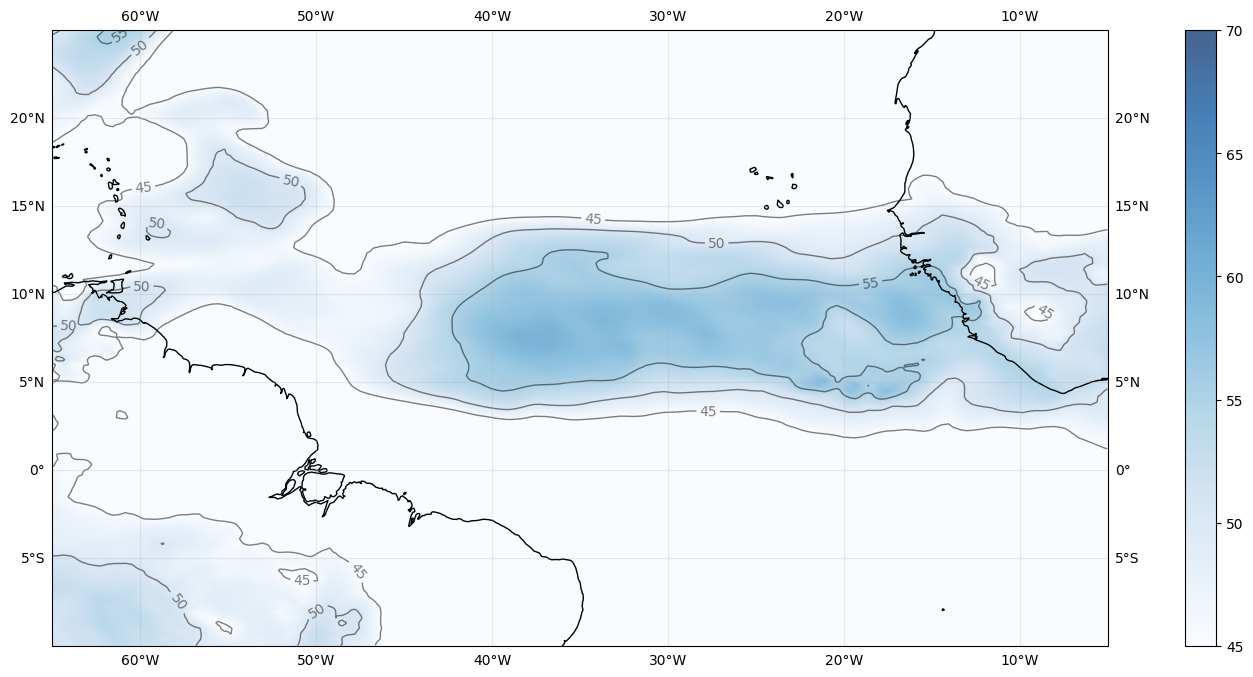

In [8]:
levels_cwv = np.sort(np.unique([cwv_crit, 45, 50, 55]))

plt.figure(figsize = (20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-65, -5, -10, 25], crs=ccrs.PlateCarree())
ax.coastlines(alpha=1.0)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha = 0.25)

date_sel="2016-09-25T12:00:00"

field = era5.tcwv.sel(time=date_sel)

im = healpix_show(field, method="linear",
                  alpha = 0.75, cmap = 'Blues', vmin = 45, vmax = 70)
plt.colorbar(im)

contour_lines = healpix_contour(field,
                                levels=levels_cwv, colors='k', linewidths=1, alpha = 0.5)

plt.clabel(contour_lines, inline=True, fontsize=10, colors='k', fmt='%d');

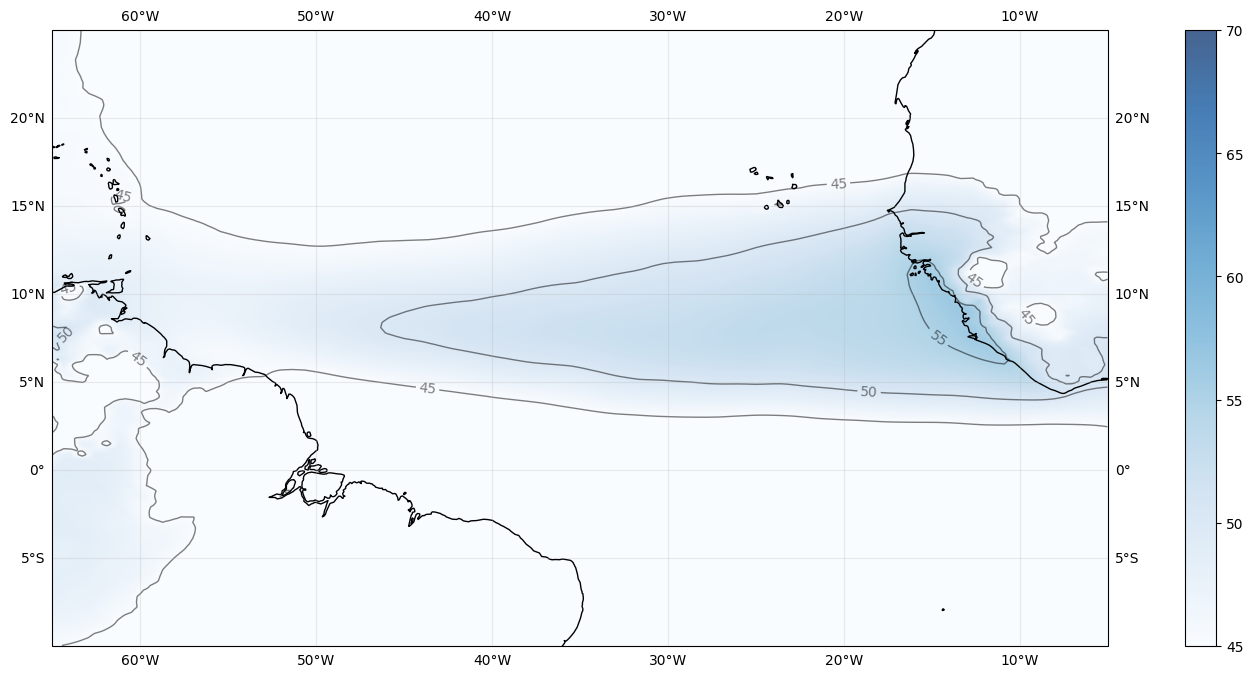

In [9]:
levels_cwv = np.sort(np.unique([cwv_crit, 45, 50, 55]))

plt.figure(figsize = (20, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-65, -5, -10, 25], crs=ccrs.PlateCarree())
ax.coastlines(alpha=1.0)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha = 0.25)

date_sel="2016-08-08T12:00:00"

field = era5.tcwv.where(era5.time.dt.month.isin([9]), drop=True).mean("time")

im = healpix_show(field, method="linear",
                  alpha = 0.75, cmap = 'Blues', vmin = 45, vmax = 70)
plt.colorbar(im)

contour_lines = healpix_contour(field,
                                levels=levels_cwv, colors='k', linewidths=1, alpha = 0.5)

plt.clabel(contour_lines, inline=True, fontsize=10, colors='k', fmt='%d');

In [10]:
is_orcestra_east = egh.isel_extent(era5, [-26, -21, 0, 25]) #[W, E, S, N]
is_orcestra_west = egh.isel_extent(era5, [-48, -43, 0, 25]) #[W, E, S, N]

In [11]:
era5_east_aug = era5.sel(
    cell=is_orcestra_east,
).where(
    era5.time.dt.month.isin([8]), drop=True
)

era5_west_sep = era5.sel(
    cell=is_orcestra_west,
).where(
    era5.time.dt.month.isin([9]), drop=True
)

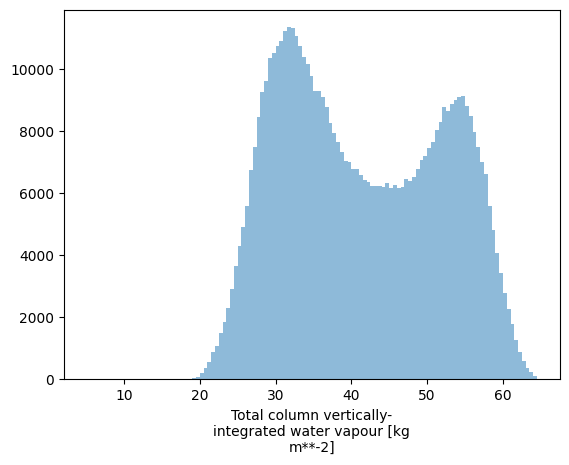

In [28]:
era5_bimodal = era5.sel(
    cell=egh.isel_extent(era5, [-26, -21, -10, 20]) #[W, E, S, N],
).where(
    era5.time.dt.month.isin([8,9]), drop=True
)

era5_bimodal["tcwv"].plot.hist(
    bins = np.arange(5, 65, 0.5),
    alpha = 0.5
);

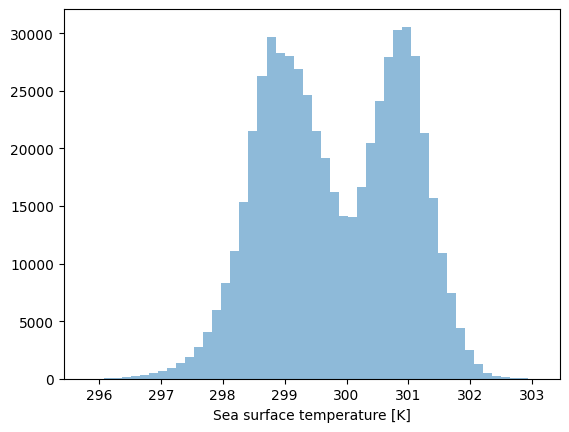

In [27]:
era5_bimodal["sst"].plot.hist(
    bins = 50,
    alpha = 0.5
);

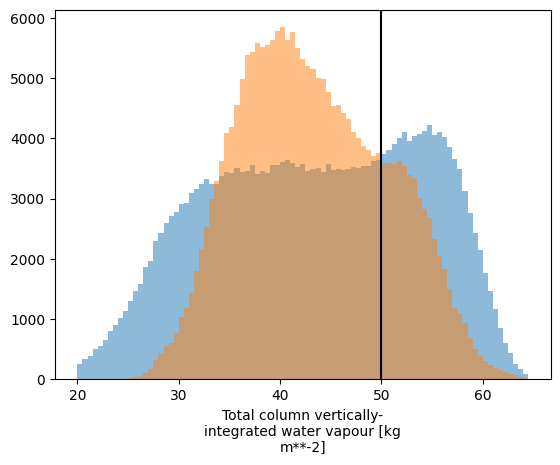

In [13]:
era5_east_aug["tcwv"].plot.hist(
    bins = np.arange(20, 65, 0.5),
    alpha = 0.5
)

era5_west_sep["tcwv"].plot.hist(
    bins = np.arange(20, 65, 0.5),
    alpha = 0.5
)

plt.axvline(cwv_crit, c = 'k');

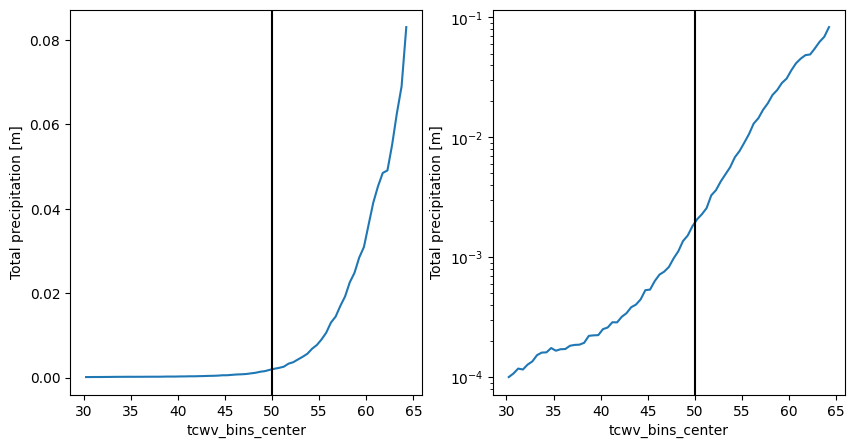

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))


for ax in axes:
    plt.sca(ax)

    era5_east_aug.tp.groupby_bins(
        era5_east_aug.tcwv, bins = np.arange(30, 65, 0.5)
    ).mean(
    ).plot()
    
    plt.axvline(cwv_crit, c = 'k')

plt.yscale('log');

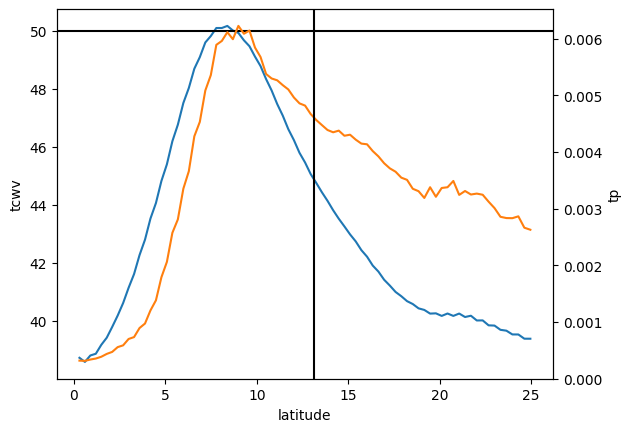

In [15]:
era5_west_sep["tcwv"].mean("time"
).groupby(
    era5_west_sep.latitude
).mean(
).plot(
)

plt.axhline(cwv_crit, c = 'k')

plt.sca(plt.twinx(plt.gca()))
era5_west_sep["tp"].mean("time"
).groupby(
    era5_west_sep.latitude
).mean(
).plot(ylim = 0.0, c = 'C1'
)

plt.axvline(coordinates['bcoNorth'], color = 'k'); #Sal

In [16]:
def lat_min_max(data, latitudes, threshold):
    
    data_larger_threshold = latitudes[np.where(data>threshold)]
    
    if len(data_larger_threshold) < 2:
        lat_min, lat_max = np.nan, np.nan
    else:
        lat_min, lat_max = data_larger_threshold[0], data_larger_threshold[-1]
    return lat_min, lat_max

In [17]:
data_cwv = era5_east_aug["tcwv"].groupby(era5_east_aug.latitude).mean().compute()
lat_cwv = data_cwv.latitude

lat_min, lat_max = xr.apply_ufunc(
    lat_min_max,
    data_cwv,
    lat_cwv,
    cwv_crit,
    input_core_dims=[["latitude"], ["latitude"], []],
    output_core_dims=[[], []],
    exclude_dims=set(("latitude",)),
    vectorize=True,  # loop over non-core dims
)

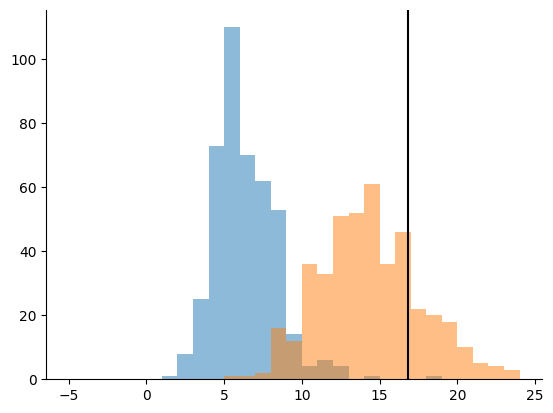

In [18]:
lat_min.plot.hist(bins = np.arange(-5, 25, 1), alpha = 0.5)#, density=True, cumulative=True)
lat_max.plot.hist(bins = np.arange(-5, 25, 1), alpha = 0.5)#, density=True, cumulative=True)

plt.axvline(16.85, color = 'k')

sn.despine(); #Sal

In [19]:
#leg_coords = [(lat_airport, lon_airpot)]

def calc_length_track(leg_coords): 
        
    distanceKm = 0
    for i_coord in range(len(leg_coords)-1):
        distanceKm += geopy.distance.geodesic(leg_coords[i_coord], leg_coords[i_coord+1]).km
        
    return distanceKm

In [20]:
n_ts = len(lat_min.time)

distanceOneWayKm = np.arange(n_ts)*np.nan

lon_max = -25.0
lon_min = -26.0

for ts in range(n_ts):
    
    if np.isnan(lat_max[ts].values):
        distanceOneWayKm[ts] = np.nan
        
    else:
        leg_coords = [(coordinates['salNorth'], coordinates['salEast']), 
                      (lat_max[ts].values, lon_max),
                      (lat_min[ts].values, lon_max+(lat_max[ts].values-lat_min[ts].values)*np.tan(np.pi*EC_angle/180))
                     ]

        distanceOneWayKm[ts] = calc_length_track(leg_coords)
    
durationOneWayH = 2*distanceOneWayKm/halo_speed_km_h

No 50.0mm boundaries found in 2 out of 434 cases


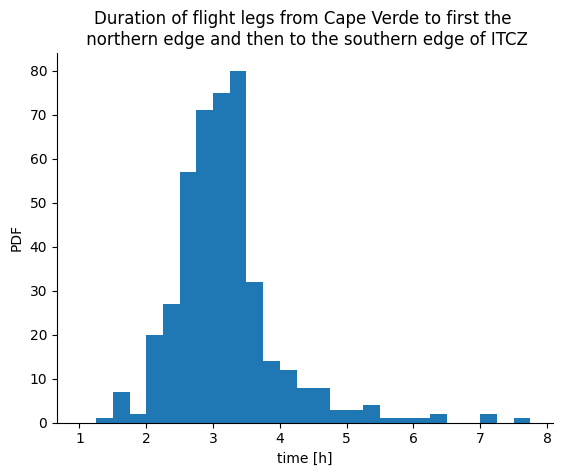

In [21]:
plt.hist(durationOneWayH, bins = np.arange(1, 8, 0.25))
plt.title('Duration of flight legs from Cape Verde to first the \n northern edge and then to the southern edge of ITCZ');

print(f"No {cwv_crit}mm boundaries found in {np.sum(np.isnan(durationOneWayH))} out of {len(durationOneWayH)} cases")

plt.ylabel('PDF')
plt.xlabel('time [h]')
sn.despine();